(double-click to edit)
# 学生証番号 03-170465
# 名前 Fukuoka Takuya

# 3.1. [a,b)に含まれる整数の和 / Sum of integers in [a,b)

In [1]:
def sum(a, b):
    sum = 0
    for i in range(a, b):
        sum += i
    return sum

In [2]:
sum(3, 10)

42

# 3.2. リストの和 / Sum of numbers in a list

In [3]:
def sumlist(l):
    sum = 0
    for i in l:
        sum += i
    return sum

In [4]:
sumlist([3, 7, 9])

19

# 3.3. [a,b)に含まれる整数のリスト / List of integers in [a,b)

In [5]:
def my_range(a, b):
    l = []
    a_ = a
    while True:
        if b <= a_:
            break
        l.append(a_)
        a_ += 1
    return l

In [6]:
my_range(0, 10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# 3.4. クイックソート / Quicksort

In [7]:
def qs(l):
    if len(l) <= 1:
        return l
    l_left = []
    l_right =[]
    for item in l[1:]:
        if item < l[0]:
            l_left.append(item)
        else:
            l_right.append(item)
    return qs(l_left) + [l[0]] + qs(l_right)

In [8]:
qs([8,5,7,2])

[2, 5, 7, 8]

# 3.5. 組み込みのライブラリモジュールの利用(random_ints) / Using builtin library modules (random_ints)

In [9]:
import random
def random_ints(a, n):
    l = []
    for _ in range(n):
        l.append(random.randint(0, a))
    return l

In [10]:
random_ints(1000, 5)

[435, 962, 75, 138, 29]

# 3.6. 長いリストのソート / Sort a large list

In [11]:
def check_sorted(l):
    for i, v in enumerate(l):
        if i == 0:
            before_value = v
            continue
        if before_value > v:
            return 0
        before_value = v
    return 1

In [12]:
check_sorted([3, 1, 2])

0

In [13]:
check_sorted([1,2,4])

1

In [14]:
def test_qs(n):
    l = random_ints(100000, n)
    if check_sorted(qs(l)):
        return 1
    else:
        return 0

In [15]:
test_qs(10000)

1

# 3.7. 実行時間測定 / Measure execution time

In [16]:
import time
def measure_qs(n):
    start_time = time.time()
    test_qs(n)
    end_time = time.time()
    print("OK {} elems in {} sec".format(n, end_time - start_time))

In [17]:
measure_qs(100000)

OK 100000 elems in 0.417087078094 sec


# 3.8. クラスを使ってみる / Use a class

In [18]:
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def norm2(self):
        return self.x ** 2 + self.y ** 2

In [19]:
p = point(3, 4)
p

<__main__.point instance at 0x7f3bb4117488>

In [20]:
p.x

3

In [21]:
p.y

4

In [22]:
p.norm2()

25

# 3.10.1 Circleクラス / Circle class

In [23]:
class Circle:
    def __init__(self, cx, cy, r):
        self.cx = cx;
        self.cy = cy;
        self.r = r;
    
    def to_svg(self):
        return '<circle cx="{}" cy="{}" r="{}" stroke="{}" fill="{}" />'.format(self.cx, self.cy, self.r, "black", "white")
    
    def bb(self):
        return (self.cx - self.r, self.cy - self.r, self.r * 2, self.r * 2)

In [24]:
c = Circle(100, 200, 70)
c.to_svg()

'<circle cx="100" cy="200" r="70" stroke="black" fill="white" />'

In [25]:
c.bb()

(30, 130, 140, 140)

# 3.10.2 Rectクラス / Rect class

In [49]:
class Rect:
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.width = width;
        self.height = height;
    
    def to_svg(self):
        return '<rect x="{}" y="{}" width="{}" height="{}" stroke="{}" fill="{}" />'.format(self.x, self.y, self.width, self.height, "black", "white")
    
    def bb(self):
        return (self.x, self.y, self.width, self.height)

In [50]:
r = Rect(300, 400, 80, 90)
r.to_svg()

'<rect x="300" y="400" width="80" height="90" stroke="black" fill="white" />'

In [51]:
r.bb()

(300, 400, 80, 90)

# 3.10.3. SVGCanvasクラス / SVGCanvas class

In [29]:
class SVGCanvas:
    def __init__(self):
        self.obj_list = []
        self.x_min = None
        self.y_min = None
        self.x_max = None
        self.y_max = None
    
    def add(self, obj):
        self.obj_list.append(obj)
        self._update(obj)
    
    def to_svg(self):
        svg_head = '''<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<svg 
    xmlns="http://www.w3.org/2000/svg"
    width="{}" height="{}"
    viewBox="{} {} {} {}" 
>
'''.format(self._get_width(), self._get_height(), self.x_min, self.y_min, self._get_width(), self._get_height())
        
        for obj in self.obj_list:
            svg_head  += obj.to_svg()
            svg_head += "\n"
        
        svg_head += "</svg>"
        
        return svg_head
    
    def _update(self, obj):
        if self.x_min == None:
            self.x_min = obj.bb()[0]
        else:
            self.x_min = min(self.x_min, obj.bb()[0])

        if self.y_min == None:
            self.y_min = obj.bb()[1]
        else:
            self.y_min = min(self.y_min, obj.bb()[1])
                
        if self.x_max == None:
            self.x_max = obj.bb()[0] + obj.bb()[2]
        else:
            self.x_max = max(self.x_max, obj.bb()[0] + obj.bb()[2])
        
        if self.y_max == None:
            self.y_max = obj.bb()[1] + obj.bb()[3]
        else:
            self.y_max = max(self.y_max, obj.bb()[1] + obj.bb()[3])
    
    def _get_width(self):
        return self.x_max - self.x_min
    
    def _get_height(self):
        return self.y_max - self.y_min

In [30]:
from IPython.display import SVG

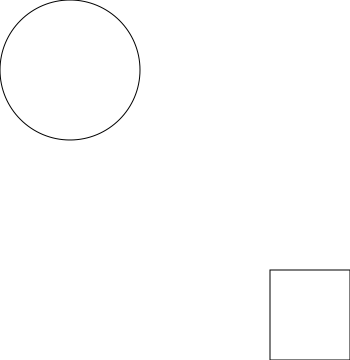

In [31]:
sc = SVGCanvas()
sc.add(c)
sc.add(r)
SVG(sc.to_svg())

# 3.10.4. 共通の親クラス ClosedShape / A common parent class ClosedShape

In [32]:
class ClosedShape(object):
    def __init__(self):
        self.fill = "white"
        self.stroke = "black"

    def set_fill(self, color):
        self.fill = color
    
    def set_stroke(self, color):
        self.stroke = color

In [33]:
class Circle(ClosedShape):
    def __init__(self, cx, cy, r):
        super(Circle, self).__init__()
        self.cx = cx;
        self.cy = cy;
        self.r = r;
    
    def to_svg(self):
        return '<circle cx="{}" cy="{}" r="{}" stroke="{}" fill="{}" />'.format(self.cx, self.cy, self.r, self.stroke, self.fill)
    
    def bb(self):
        return (self.cx - self.r, self.cy - self.r, self.r * 2, self.r * 2)

In [34]:
class Rect(ClosedShape):
    def __init__(self, x, y, width, height):
        super(Rect, self).__init__()
        self.x = x
        self.y = y
        self.width = width;
        self.height = height;
    
    def to_svg(self):
        return '<rect x="{}" y="{}" width="{}" height="{}" stroke="{}" fill="{}" />'.format(self.x, self.y, self.width, self.height, self.stroke, self.fill)
    
    def bb(self):
        return (self.x, self.y, self.width, self.height)

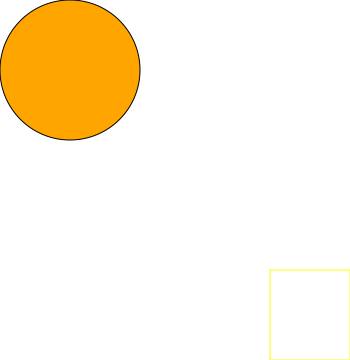

In [35]:
c = Circle(100, 200, 70)
c.set_fill("orange")
r = Rect(300, 400, 80, 90)
r.set_stroke("yellow")
sc = SVGCanvas()
sc.add(c)
sc.add(r)
SVG(sc.to_svg())

# 3.10.5. その他の図形クラス(任意) / Other shape classes (optional)

# 3.10.6. 多数の図形の生成 / Generate many shapes

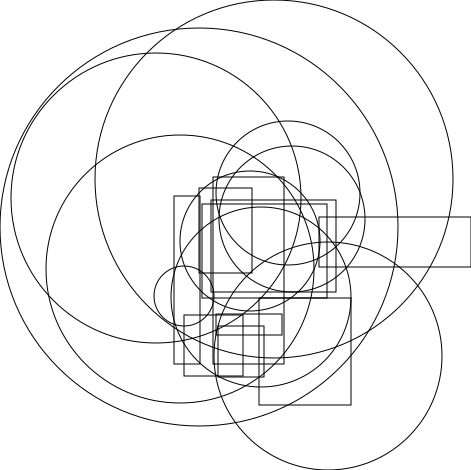

In [36]:
from random import randrange
sc = SVGCanvas()
for _ in range(10):
    c = Circle(randrange(200), randrange(200), randrange(200))
    c.set_fill("none")
    r = Rect(randrange(200), randrange(200), randrange(200), randrange(200))
    r.set_fill("none")
    sc.add(c)
    sc.add(r)
SVG(sc.to_svg())

# 3.11. 2分探索木 / Binary search tree

In [94]:
class bs_tree_node(object):
    def __init__(self, value):
        self.value = value
        self.parent = None
        self.pos = "root"
        self.right = None
        self.left = None
    
    def set_right(self, right_node):
        right_node.parent = self
        right_node.pos = "right"
        self.right = right_node
    
    def set_left(self, left_node):
        left_node.parent = self
        left_node.pos = "left"
        self.left = left_node

In [104]:
class bs_tree(object):
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        new_node = bs_tree_node(value)
        if self.root is None:
            self.root = new_node
            return
        
        node_now = self.root
        while(True):
            if value < node_now.value:
                if node_now.left is None:
                    node_now.set_left(new_node)
                    break
                else:
                    node_now = node_now.left
                    continue
            else:
                if node_now.right is None:
                    node_now.set_right(new_node)
                    break
                else:
                    node_now = node_now.right
                    continue

In [105]:
t = bs_tree()
t.insert(10)
t.insert(8)
t.insert(15)

In [106]:
print("root: {}, left: {}, right: {}".format(t.root.value, t.root.left.value, t.root.right.value))

root: 10, left: 8, right: 15


In [107]:
t.root.left.parent

# 3.12. 2分探索木の要素の昇順リスト / Ascending list of elements in a binary search tree

In [108]:
class bs_tree(object):
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        new_node = bs_tree_node(value)
        if self.root is None:
            self.root = new_node
            return
        
        node_now = self.root
        while True:
            if value < node_now.value:
                if node_now.left is None:
                    node_now.left = new_node
                    break
                else:
                    node_now = node_now.left
                    continue
            else:
                if node_now.right is None:
                    node_now.right = new_node
                    break
                else:
                    node_now = node_now.right
                    continue
        
    def all_vals_list(self):
        if self.root is None:
            return []
        l = []
        self._append_value_recur(l, self.root)
        print(l)
    
    def _append_value_recur(self, l, node_now):
        if node_now.left is not None:
            self._append_value_recur(l, node_now.left)
        l.append(node_now.value)
        if node_now.right is not None:
            self._append_value_recur(l, node_now.right)

In [109]:
t = bs_tree()
t.insert(10)
t.insert(8)
t.insert(15)
t.insert(17)
t.insert(2)
t.insert(16)
t.all_vals_list()

[2, 8, 10, 15, 16, 17]


# 3.13. 2分探索木の要素の昇順イテレータ / An iterator generating elements of a binary tree in the ascending order

In [116]:
class bs_tree(object):
    def __init__(self):
        self.root = None
    
    def insert(self, value):
        new_node = bs_tree_node(value)
        if self.root is None:
            self.root = new_node
            return
        
        node_now = self.root
        while(True):
            if value < node_now.value:
                if node_now.left is None:
                    node_now.set_left(new_node)
                    break
                else:
                    node_now = node_now.left
                    continue
            else:
                if node_now.right is None:
                    node_now.set_right(new_node)
                    break
                else:
                    node_now = node_now.right
                    continue
        
    def __iter__(self):
        if self.root is None:
            raise StopIteration
        node_now = self.root
        move_type = "from_top"
        
        while True:
            #from IPython.core.debugger import Pdb; Pdb().set_trace()
            if move_type == "from_top":
                if node_now.left is not None:
                    node_now = node_now.left
                    move_type = "from_top"
                    continue
                
                #print("yield {}".format(node_now.value))
                yield node_now.value
                
                if node_now.right is not None:
                    node_now = node_now.right
                    move_type = "from_top"
                    continue
                
                if node_now.parent is None:
                    break
                else:
                    if node_now.pos == "left":
                        move_type = "from_left"
                    elif node_now.pos == "right":
                        move_type == "from_right"
                    node_now = node_now.parent
                    continue
            
            elif move_type == "from_left":
                #print("yield {}".format(node_now.value))
                yield node_now.value
                if node_now.right is not None:
                    node_now = node_now.right
                    move_type = "from_top"
                    continue
                
                if node_now.parent is None:
                    break
                if node_now.pos == "left":
                    move_type = "from_left"
                elif node_now.pos == "right":
                    move_type = "from_right"
                node_now = node_now.parent
                continue
            
            else:
                if node_now.parent is None:
                    break
                if node_now.pos == "left":
                    move_type = "from_left"
                elif node_now.pos == "right":
                    move_type = "from_right"
                node_now = node_now.parent
                continue

In [117]:
t = bs_tree()
t.insert(10)
t.insert(8)
t.insert(15)
t.insert(17)
t.insert(2)
t.insert(16)

for x in t:
    print(x)

2
8
10
15
16
17


# 3.14. 2分探索木の可視化(任意) / Visualize a binary search tree (optional)